In [2]:
pip install pandas

In [3]:
pip install openpyxl

In [4]:
pip install xlrd

In [5]:
pip install seaborn

In [6]:
pip install matplotlib

In [7]:
import random

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.express as px

# Yenny Fernanda Morales Cortez A00827609

## *Introduction*

### Dataset: Solar Power by Country



In [120]:
datafile = "solar_power_by_country.csv"

# Read the .csv file and store it
df = pd.read_csv(datafile)
df

,Country or territory,2016_New,2016_Total,2017_New,2017_Total,2018_New,2018_Total,2019_New,2019_Total,2020_New,2020_Total,W per capita 2019,Share of total consumption %
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,NaN,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4
3,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3
4,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Oman,NaN,2.0,NaN,8.0,NaN,8,NaN,9,NaN,109,NaN,NaN
76,Colombia,NaN,2.0,NaN,11.0,NaN,86,NaN,90,NaN,107,NaN,NaN
77,Kenya,NaN,32.0,NaN,39.0,NaN,105,NaN,106,NaN,106,NaN,NaN
78,Guatemala,NaN,93.0,NaN,99.0,NaN,101,NaN,101,NaN,101,NaN,NaN


**Description of the data:** 
The dataset shows the total power capacity (MW) and new installation, in each country from 2016 to 2020.

**My variables of interest**
*   Country or territory: The name of the coutry.
*   2016_Total - 2020_Total: Electricity produced by Solar Power in MW (MegaWatts).
* 2016_New - 2020_New: New Electricity produced by Solar Power compared to the year before
* W per capita 2019: Estimated energy consumption per person in 2019 (W)
* Share of total consumption: Percentage of energy that is consumed by each country from the total world energy consumption

In [122]:
result = df.dtypes
print(result)

Country or territory             object
2016_New                        float64
2016_Total                      float64
2017_New                        float64
2017_Total                      float64
2018_New                        float64
2018_Total                        int64
2019_New                        float64
2019_Total                        int64
2020_New                        float64
2020_Total                        int64
W per capita 2019               float64
Share of total consumption %    float64
dtype: object


In [101]:
# Cleaning the data
# Replaces NaN for 0
df = df.fillna(0)

In [102]:
# Changes the names of the columns
df.rename(columns = {'Country or territory':'Country',
                     '2016_Total':'2016',
                     '2017_Total':'2017',
                     '2018_Total':'2018',
                     '2019_Total':'2019',
                     '2020_Total':'2020',
                     '2016_New':'2016 N',
                     '2017_New':'2017 N',
                     '2018_New':'2018 N',
                     '2019_New':'2019 N',
                     '2020_New':'2020 N'},
          inplace = True)
df.head()

,Country,2016 N,2016,2017 N,2017,2018 N,2018,2019 N,2019,2020 N,2020,W per capita 2019,Share of total consumption %
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,0.0,101433.0,0.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4
3,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3
4,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7


In [103]:
df2 = df.drop(['2016 N',
               '2017 N',
               '2018 N',
               '2019 N',
               '2020 N',
              'W per capita 2019'],
              axis = 1)
df2.head()

,Country,2016,2017,2018,2019,2020,Share of total consumption %
0,China,78070.0,131000.0,175018,204700,254355,6.2
1,European Union,101433.0,107150.0,115234,134129,152917,6.0
2,United States,40300.0,51000.0,53184,60682,75572,3.4
3,Japan,42750.0,49000.0,55500,63000,67000,8.3
4,Germany,41220.0,42000.0,45930,49200,53783,9.7


## ***Which country produced the most solar power electricity (MW) in 2020?***

In [104]:
maxi = df['2020'].max()
maxid = df['2020'].idxmax()
maxc = df.iloc[0,maxid]

print('The country that produced the most solar power electricity in 2020 was', maxc, 'with', maxi, 'MW.')

The country that produced the most solar power electricity in 2020 was China with 254355 MW.


In [105]:
fig1 = px.sunburst(df,
                   values = '2020',
                   path = ['2020','Country','Share of total consumption %'],
                   color = 'Country',
                   title = 'Solar Energy (MW) Produced and Share of Consumption (%) by Country in 2020'
                   )
plt.savefig('sample_data/MW_perCountry_2020')
fig1.show()

<Figure size 432x288 with 0 Axes>

In [106]:
fig2 = px.sunburst(df,
                   values = 'W per capita 2019',
                   path = ['Country','W per capita 2019'],
                   color = 'Country',
                   title = 'W consumed per capita in 2019 by Country'
                   )
plt.savefig('sample_data/MW_perCountry_2020')
fig2.show()

<Figure size 432x288 with 0 Axes>

# ***What is the total solarpower electricity produced by Mexico in 2020?***

In [107]:
print('The total solar power electricity produced by Mexico in 2020 is:', df2.iloc[19,5],'MW')

The total solar power electricity produced by Mexico in 2020 is: 5644 MW


# ***Solar energy production in Mexico through the years.***

In [108]:
df.set_index('Country', inplace = True)
df.head(2)

,2016 N,2016,2017 N,2017,2018 N,2018,2019 N,2019,2020 N,2020,W per capita 2019,Share of total consumption %
Country,,,,,,,,,,,,
China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
European Union,0.0,101433.0,0.0,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0


In [109]:
df2.set_index('Country', inplace = True)
df2.head()

,2016,2017,2018,2019,2020,Share of total consumption %
Country,,,,,,
China,78070.0,131000.0,175018,204700,254355,6.2
European Union,101433.0,107150.0,115234,134129,152917,6.0
United States,40300.0,51000.0,53184,60682,75572,3.4
Japan,42750.0,49000.0,55500,63000,67000,8.3
Germany,41220.0,42000.0,45930,49200,53783,9.7


In [110]:
df_mexico = df.iloc[[19],[1,3,5,7,9]]
mx_line = df_mexico.transpose()
mx_line

Country,Mexico
2016,320.0
2017,539.0
2018,3200.0
2019,4426.0
2020,5644.0


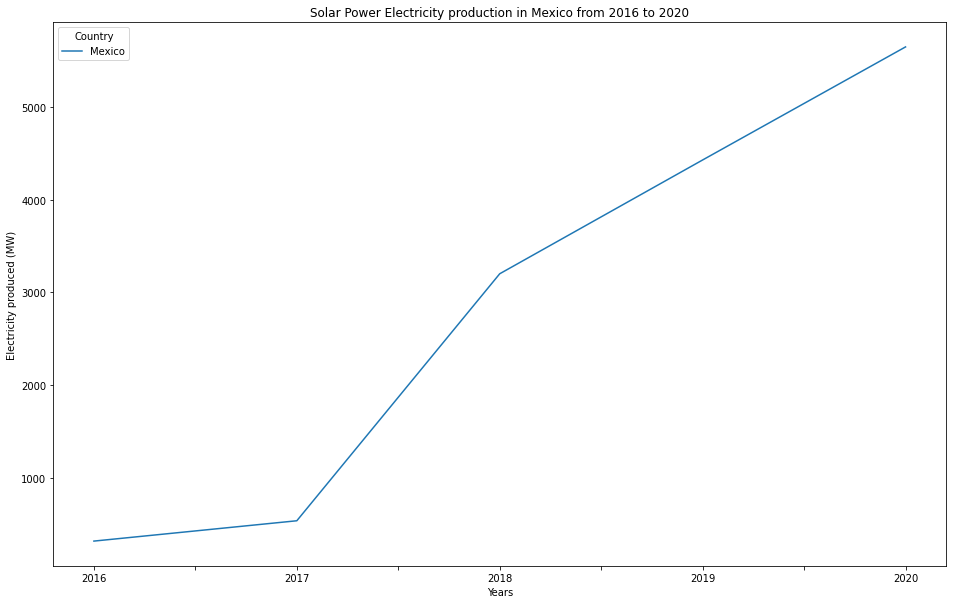

In [111]:
mx_line.plot(kind='line', figsize=(16,10))

plt.title('Solar Power Electricity production in Mexico from 2016 to 2020')
plt.ylabel('Electricity produced (MW)')
plt.xlabel('Years')

plt.show()

In [112]:
df2_mexico = df2.iloc[19,0:6]
mx2_line = df2_mexico.transpose()
mx2_line

2016                             320.0
2017                             539.0
2018                            3200.0
2019                            4426.0
2020                            5644.0
Share of total consumption %       3.2
Name: Mexico, dtype: float64

# ***Top 5 Solar energy generating countries***

In [113]:
df2 = df2.drop(['Share of total consumption %'],
              axis = 1)
df2.head()

,2016,2017,2018,2019,2020
Country,,,,,
China,78070.0,131000.0,175018,204700,254355
European Union,101433.0,107150.0,115234,134129,152917
United States,40300.0,51000.0,53184,60682,75572
Japan,42750.0,49000.0,55500,63000,67000
Germany,41220.0,42000.0,45930,49200,53783


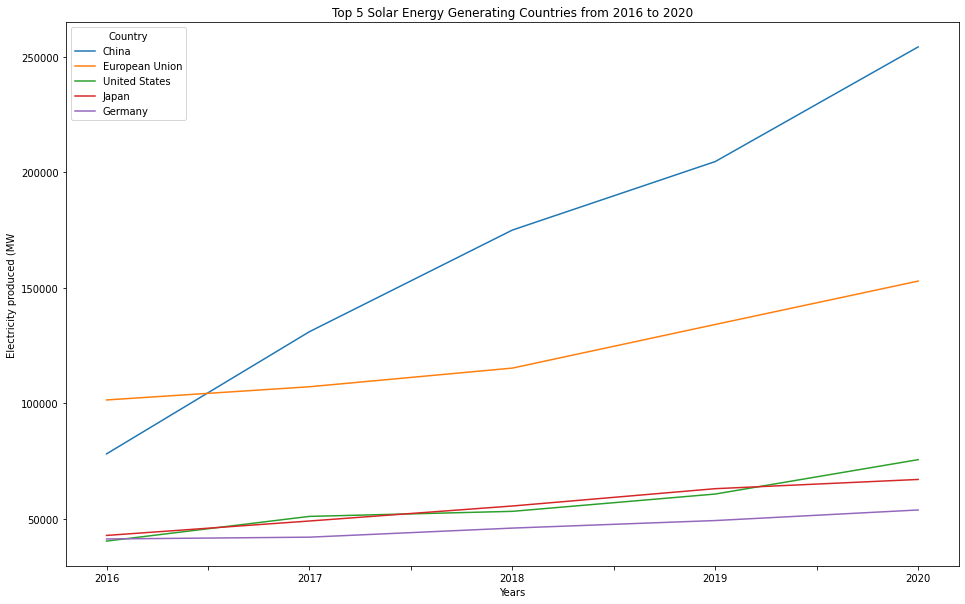

In [114]:
df_top = df2.sort_values(by = '2020',
                        ascending = False, 
                        axis = 0,
                        inplace = False)
df_top.head()
df_top5 = df_top.head(5)
df_top5

df_top5 = df_top5.transpose()
df_top5

df_top5.plot(kind = 'line', figsize=(16,10))

plt.title('Top 5 Solar Energy Generating Countries from 2016 to 2020')
plt.ylabel('Electricity produced (MW')
plt.xlabel('Years')

plt.show()

# ***Is there any effect of Generation of Solar Power in 2019 in the Generation of Solar Power in 2020?***

In [115]:
import statsmodels.api as sm
from sklearn import linear_model

In [116]:
y = pd.DataFrame(df['2020'])
x = pd.DataFrame(df['2019'])

lm = linear_model.LinearRegression()

model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [117]:
print('The y intercept, b0 is = ', model_lm.intercept_)
print('The coef., b1 is = ', model_lm.coef_)
print('The r^2 is = ', model_lm.score(x,y))

The y intercept, b0 is =  [85.8848645]
The coef., b1 is =  [[1.19892593]]
The r^2 is =  0.9956645684156715


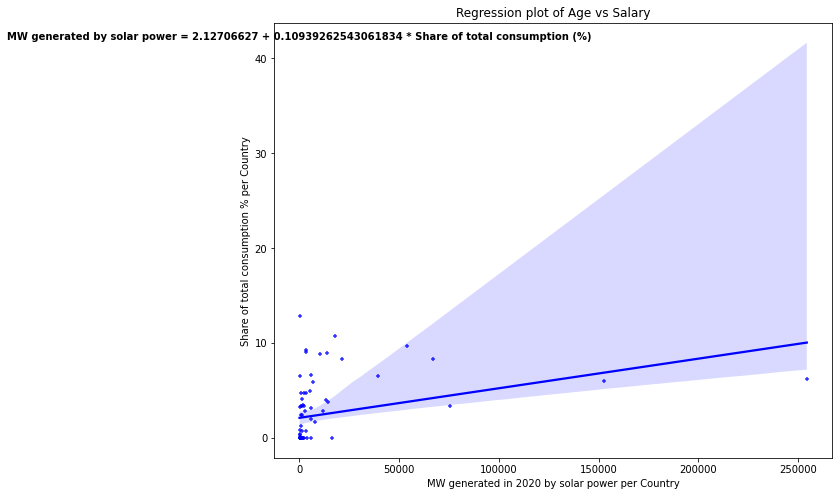

In [118]:
plt.figure(figsize = (10, 8))

ax = sns.regplot(x = '2020',
                 y = 'Share of total consumption %',
                 data = df,
                 color = 'blue',
                 marker = '+',
                 scatter_kws = {'s':20},
                 )

ax.set(xlabel = 'MW generated in 2020 by solar power per Country',
       ylabel = 'Share of total consumption % per Country')

ax.text(50, 42, 'MW generated by solar power = 2.12706627 + 0.10939262543061834 * Share of total consumption (%)',
        horizontalalignment = 'center', size = 'medium',
        color = 'black', weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

# ***Dashboard***

In [ ]:
pip install dash

In [31]:
import dash

In [32]:
from dash import html
from dash import dcc

In [ ]:
pip install jupyter_dash

In [35]:
from jupyter_dash import JupyterDash

In [54]:
p2 = JupyterDash(__name__)
p2.layout = html.Div(children=[html.H1('Gráficas de Yenny',
                                       ),
                               dcc.Graph(figure=fig1),
                               dcc.Graph(figure= fig2)
                               ]
                     )
if __name__ =='__main__':
  p2.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

# ***Conclusions***

#### **Observations from the data**

From the tables and graphics we can learn a lot about the information presented.

Some of the main observations:
* The relation beetween between the share of total consumption and the energy generated by solar power per country is very poor.
* China, veing the higher consumer of energy, is also the solar power energy most important generator.
* The information from de the linear regression is not so trust worthy, as it lacks important information.
* The top 5 generators of solar power are China, European Union, United States, Japan and Germany.
* Mexico's numbers in  solar power generation have increased surprisingly fast since 2017.

#### **General conclusions**
It is very useful to use python as data visualizer, it allows you to order the data whichever way you want, as long as you know how to use it correctly. However, it is important that the programmer completely understads the data they are working with in order to chose the best type of graphic to represent different information.

I will keep trying to get better at this because it surely is a very important skill in any job you may have as an ingeneer. I know I have room for improvement but that motivates me to learn.

It is very useful to use python as data visualizer, it allows you to order the data whichever way you want, as long as you know how to use it correctly. However, it is important that the programmer completely understads the data they are working with in order to chose the best type of graphic to represent different information.

I will keep trying to get better at this because it surely is a very important skill in any job you may have as an ingeneer. I know I have room for improvement but that motivates me to learn.